In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv("Group_13_data_cleaned.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028
...,...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340,64.738


In [4]:
# the data for the model
# selecting only NOX as target variable
nox_df = df.copy()
nox_df = nox_df.drop("CO", axis = 1) # drop the target variable CO

In [5]:
nox_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,82.028
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,89.172
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,88.849
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,96.147
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,64.738


In [6]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split

# split the data 
X = nox_df.iloc[:, :-1]
y = nox_df["NOX"]

In [7]:
# Normalizing the X and y. 
# Feature scaling
from sklearn.preprocessing import Normalizer
X = nox_ds1 = Normalizer().fit_transform(X)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [8]:
X_train.shape,X_valid.shape,X_test.shape

((22039, 9), (7347, 9), (7347, 9))

In [9]:
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsRegressor

# fitting dataset for training
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=7)

In [10]:
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
# make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# calculate the MAE for the validation set
mae_val = mean_absolute_error(y_valid, y_pred_valid)
# calculate the MSE for the validation set
mse_val = mean_squared_error(y_valid, y_pred_valid)

print("Validation Mean Absolute Error: ", mae_val)
print("Validation Mean Squared Error: ", mse_val)
print(f"RMSE on the validation set: {np.sqrt(mse_val)}")



Validation Mean Absolute Error:  3.7528044682960973
Validation Mean Squared Error:  30.626535792182285
RMSE on the validation set: 5.534124663592453


In [11]:
y_pred = model.predict(X_valid) 
r2_score(y_valid, y_pred)

0.7715272231887653

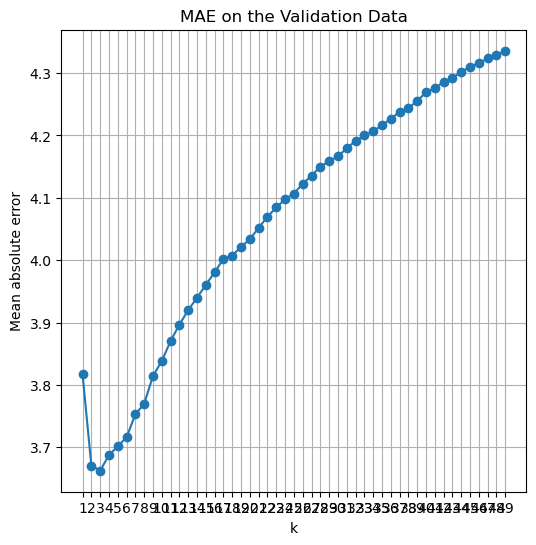

In [12]:
import matplotlib.pyplot as plt
#Training KNN Regressor with multiple neighbors
k_values = []
error = []
sqr_error=[]
root_sqr_error=[]
for k in range(1, 50):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    error.append( mean_absolute_error(y_valid, y_pred))
    sqr_error.append( mean_squared_error(y_valid,y_pred))
    root_sqr_error.append( mean_squared_error(y_valid,y_pred,squared=False))
    k_values.append(k)

#Plotting graph to observe the relation of K with mean absolute error
plt.figure(figsize = (6,6))

plt.plot(k_values, error, marker = "o")
plt.title("MAE on the Validation Data")
plt.xlabel("k")
plt.ylabel("Mean absolute error")
plt.xticks(k_values)
plt.grid();

In [77]:
import numpy as np 

print(min(error))   

3.6625122725829136


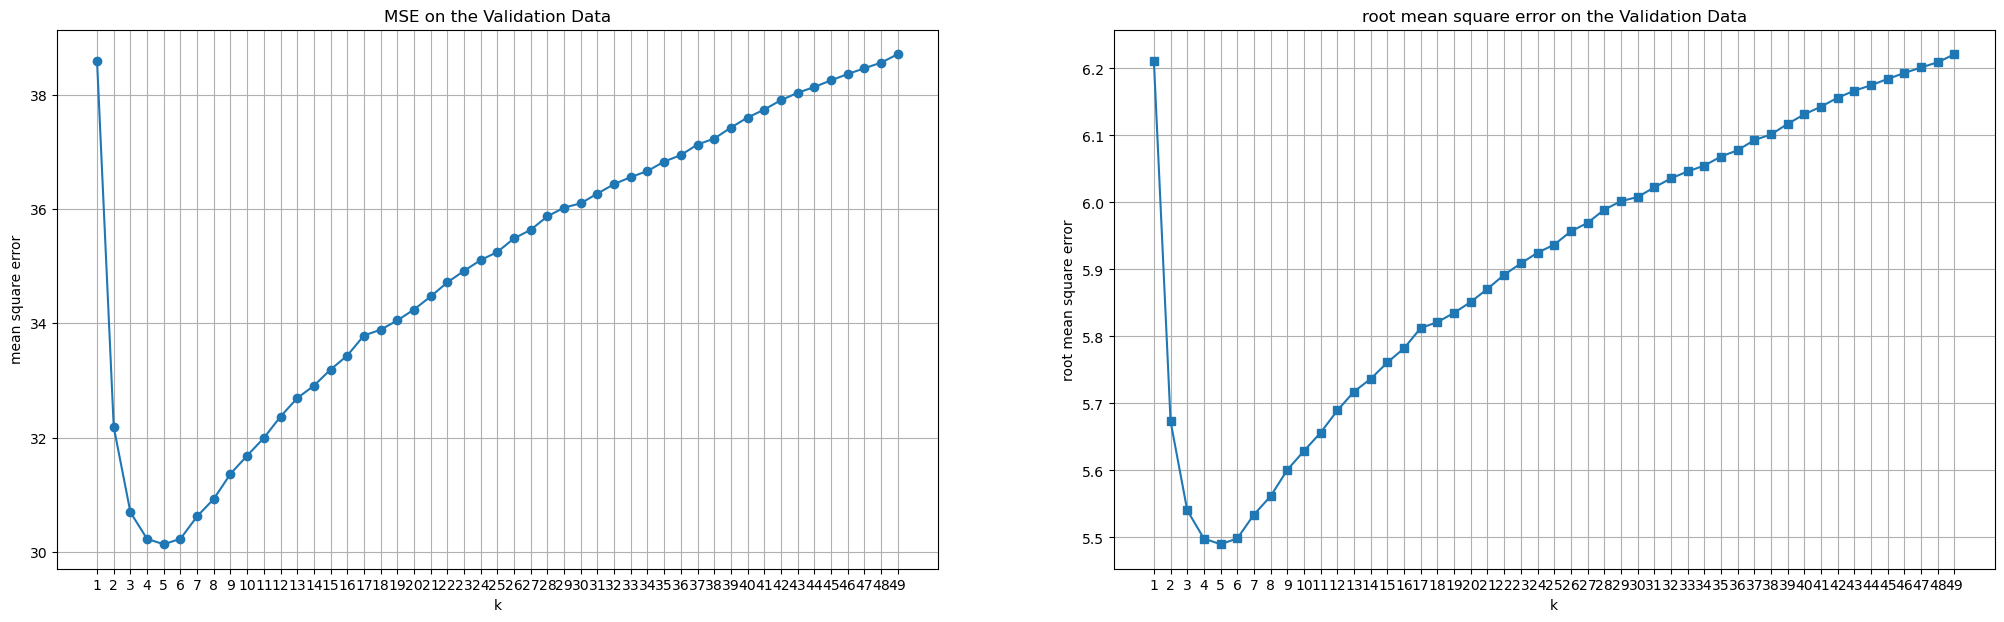

In [75]:
#Plotting graph to observe the relation of K with mean square error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
ax1.plot(k_values, sqr_error, marker = "o")
ax1.set_title("MSE on the Validation Data")
ax1.set_xlabel("k")
ax1.set_ylabel("mean square error")
ax1.set_xticks(k_values)
ax1.grid();
#Plotting graph to observe the relation of K with root mean square error
ax2.plot(k_values, root_sqr_error, marker = "s")
ax2.set_title("root mean square error on the Validation Data")
ax2.set_xlabel("k")
ax2.set_ylabel("root mean square error")
ax2.set_xticks(k_values)
ax2.grid();

In [76]:
import numpy as np 

print(min(error))   

3.6625122725829136


#  Use GridSearchCV to select hyper-parameters

In [80]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  scoring='r2',
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.0185142 , 0.01581635, 0.02009573, 0.020013  , 0.02389126,
        0.02131453, 0.01835494, 0.02164083, 0.03050776, 0.02194986,
        0.01880407, 0.02753768, 0.02011108, 0.02044959, 0.01552963,
        0.0187983 , 0.02223163, 0.02246904, 0.01611757, 0.0213079 ,
        0.0218648 , 0.02079396, 0.02015104, 0.02603841, 0.02460589,
        0.0195858 , 0.02059827, 0.02083621, 0.01581039, 0.01619811,
        0.02846866, 0.01874704, 0.02157879, 0.01807041, 0.01906424,
        0.01950312, 0.0251636 , 0.02032228, 0.02196279, 0.02294626,
        0.01983905, 0.02164197, 0.02313519, 0.02394733, 0.02871661,
        0.01889114, 0.02132239, 0.01940846, 0.02061076, 0.02338738,
        0.02240419, 0.02189221, 0.02225208, 0.01914687, 0.02204537,
        0.01755056, 0.02193346, 0.02036376, 0.02189484, 0.02204041,
        0.02115855, 0.01833739, 0.02061176, 0.02465034, 0.022227  ,
        0.02569332, 0.02028542, 0.0208879 , 0.02225809, 0.01640449,
        0.01792469, 0.01811795,

In [81]:
gs.best_score_

0.8014228866825626

In [82]:
gs.best_params_

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

In [84]:
y_pred = gs.predict(X_test)
r2_score(y_test, y_pred)

0.8143403393364212

In [85]:
# make predictions on the test set
y_pred_test = gs.predict(X_test)

# calculate the MAE for the test set
mae_val = mean_absolute_error(y_test, y_pred_test)
# calculate the MSE for the test set
mse_val = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_val)
print("Mean Squared Error: ", mse_val)
print(f"RMSE : {np.sqrt(mse_val)}")


Mean Absolute Error:  3.2138564366836886
Mean Squared Error:  24.60284183380896
RMSE : 4.960125183280051


In [88]:
#Cross validation
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
scores = cross_val_score(model,X_train,y_train, cv=cv, scoring='r2')

# Convert the scores to positive values
scores = +scores

# Print the average score and standard deviation
print("Average MAE:", scores.mean())
print("Standard deviation:", scores.std())

Average MAE: 0.708780497719813
Standard deviation: 0.00846480067011538


# CO target variable

In [110]:
# prepare the data for the model
# select the only CO as target variabel
co_df = df.copy()
co_df = co_df.drop("NOX", axis = 1) # drop the target variable CO

In [111]:
co_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747
...,...,...,...,...,...,...,...,...,...,...
36728,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.99300
36729,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.14400
36730,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.41400
36731,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.31340


In [112]:
# split the data for training and test using sklearn train_test_split function 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

# split the data 
X = co_df.iloc[:, :-1]
y = co_df["CO"]


In [113]:
X = co_df1 = Normalizer().fit_transform(X)
# normalize the data 

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [114]:
X_train.shape,X_valid.shape,X_test.shape

((22039, 9), (7347, 9), (7347, 9))

In [115]:
from numpy import mean
from numpy import std
from sklearn.neighbors import KNeighborsRegressor

# fitting dataset for training
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [116]:
# make predictions on the validation set
y_pred_valid = model.predict(X_valid)

# calculate the MAE for the validation set
mae_val = mean_absolute_error(y_valid, y_pred_valid)
# calculate the MSE for the validation set
mse_val = mean_squared_error(y_valid, y_pred_valid)

print("Validation Mean Absolute Error: ", mae_val)
print("Validation Mean Squared Error: ", mse_val)
print(f"RMSE on the validation set: {np.sqrt(mse_val)}")


Validation Mean Absolute Error:  0.6375226721674542
Validation Mean Squared Error:  1.7788667162754912
RMSE on the validation set: 1.3337416227573806


In [117]:
y_pred = model.predict(X_valid) 
r2_score(y_valid, y_pred)

0.6337494023269186

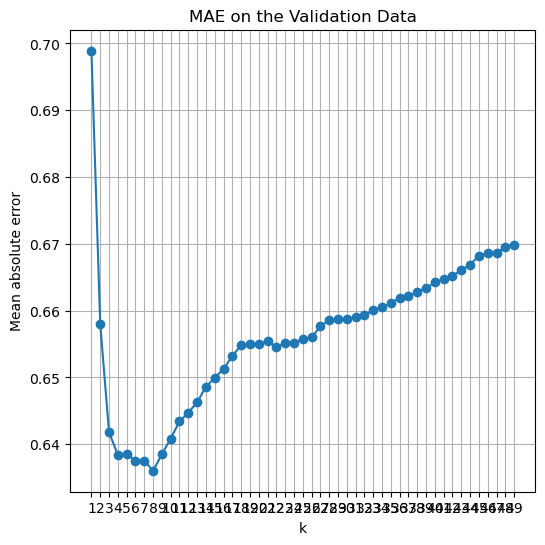

In [118]:
import matplotlib.pyplot as plt
#Training KNN Regressor with multiple neighbors
k_values = []
error = []
sqr_error=[]
root_sqr_error=[]
for k in range(1, 50):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    error.append( mean_absolute_error(y_valid, y_pred))
    sqr_error.append( mean_squared_error(y_valid,y_pred))
    root_sqr_error.append( mean_squared_error(y_valid,y_pred,squared=False))
    k_values.append(k)

#Plotting graph to observe the relation of K with mean absolute error
plt.figure(figsize = (6,6))

plt.plot(k_values, error, marker = "o")
plt.title("MAE on the Validation Data")
plt.xlabel("k")
plt.ylabel("Mean absolute error")
plt.xticks(k_values)
plt.grid();

In [119]:
import numpy as np 

print(min(error))

0.6360271669899279


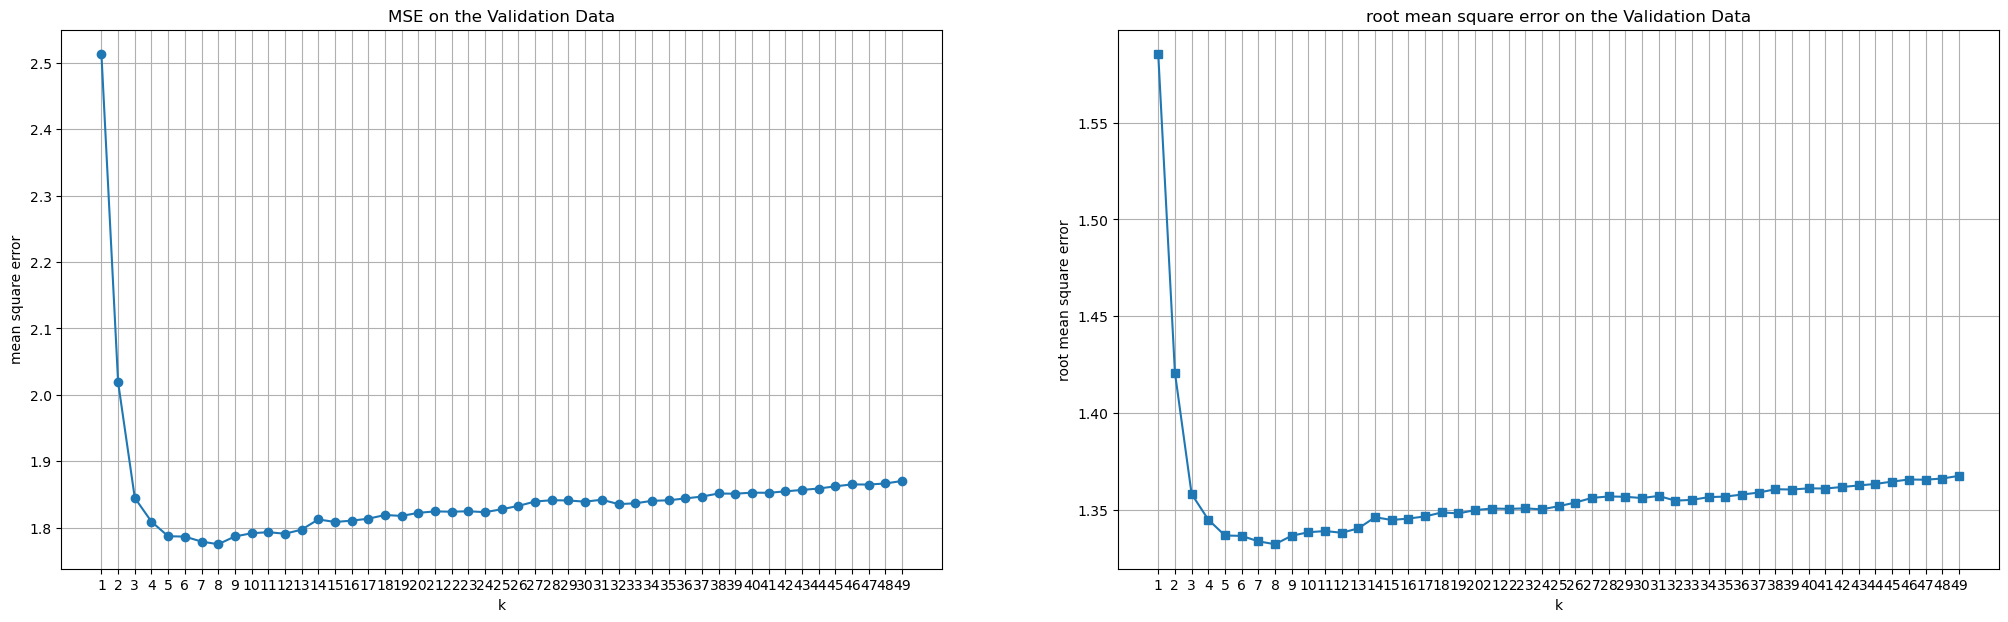

In [120]:
#Plotting graph to observe the relation of K with mean square error
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,7))
ax1.plot(k_values, sqr_error, marker = "o")
ax1.set_title("MSE on the Validation Data")
ax1.set_xlabel("k")
ax1.set_ylabel("mean square error")
ax1.set_xticks(k_values)
ax1.grid();
#Plotting graph to observe the relation of K with root mean square error
ax2.plot(k_values, root_sqr_error, marker = "s")
ax2.set_title("root mean square error on the Validation Data")
ax2.set_xlabel("k")
ax2.set_ylabel("root mean square error")
ax2.set_xticks(k_values)
ax2.grid();

## Use GridSearchCV to select hyper-parameters

In [129]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size = 0.2,random_state= 42, shuffle = True)
gs2 = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  scoring='r2',
                  cv=5)

gs2.fit(X_train, y_train)

gs2.cv_results_

{'mean_fit_time': array([0.02139211, 0.01824079, 0.02515564, 0.01868978, 0.02328172,
        0.01856484, 0.02331576, 0.02191114, 0.02157726, 0.02271538,
        0.0198638 , 0.01894531, 0.02009182, 0.02387643, 0.02183142,
        0.02140293, 0.02413411, 0.01896653, 0.02711639, 0.02572365,
        0.02287884, 0.02108459, 0.02168818, 0.01976008, 0.02255893,
        0.0224443 , 0.02088866, 0.01760669, 0.0225287 , 0.02239232,
        0.02081122, 0.02354956, 0.02339091, 0.0244607 , 0.02400808,
        0.02641687, 0.0214478 , 0.02086792, 0.02081184, 0.02192264,
        0.02244096, 0.02246337, 0.02103114, 0.02577   , 0.02626128,
        0.01998863, 0.02080445, 0.02558665, 0.01791253, 0.02239628,
        0.02241526, 0.02042403, 0.01920948, 0.02256064, 0.02246194,
        0.02574768, 0.02242956, 0.02601433, 0.02096338, 0.02614594,
        0.02580996, 0.02284346, 0.02081943, 0.02080951, 0.0208127 ,
        0.02476988, 0.02082853, 0.03144474, 0.02811646, 0.02665176,
        0.02053523, 0.02192893,

In [130]:
gs2.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [131]:
gs2.best_score_

0.6908056702491692

In [132]:
y_pred = gs2.predict(X_test)
r2_score(y_test, y_pred)

-739.6039557701091

In [134]:
# make predictions on the test set
y_pred_test = gs.predict(X_test)

# calculate the MAE for the test set
mae_val = mean_absolute_error(y_test, y_pred_test)
# calculate the MSE for the test set
mse_val = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_val)
print("Mean Squared Error: ", mse_val)
print(f"RMSE : {np.sqrt(mse_val)}")


Mean Absolute Error:  62.66164822926464
Mean Squared Error:  4027.1353949316776
RMSE : 63.45971474039005


In [135]:
#Cross validation
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
n_folds = 5

# Define the cross-validation method
cv = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Compute the cross-validation scores
scores = cross_val_score(model,X_train,y_train, cv=cv, scoring='r2')

# Convert the scores to positive values
scores = +scores

# Print the average score and standard deviation
print("Average MAE:", scores.mean())
print("Standard deviation:", scores.std())

Average MAE: 0.6298613141449706
Standard deviation: 0.015362929229844547


## Use GridSearchCV to select hyper-parameters

In [142]:
rs = RandomizedSearchCV(estimator = KNeighborsRegressor(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

0.6824040649515613

In [143]:
rs.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 18}

In [144]:
y_pred = rs.predict(X_test)
r2_score(y_test, y_pred)

0.6695594806073526

In [145]:
# make predictions on the test set
y_pred_test = gs.predict(X_test)

# calculate the MAE for the test set
mae_val = mean_absolute_error(y_test, y_pred_test)
# calculate the MSE for the test set
mse_val = mean_squared_error(y_test, y_pred_test)

print("Mean Absolute Error: ", mae_val)
print("Mean Squared Error: ", mse_val)
print(f"RMSE : {np.sqrt(mse_val)}")


Mean Absolute Error:  62.66164822926464
Mean Squared Error:  4027.1353949316776
RMSE : 63.45971474039005
